# Lab2_N11 Пшенин В.И. 6133

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
noise = np.random.randn(884, 2)

In [29]:
# Параметры генерации данных

In [30]:
cloud1 = noise + np.array([5, 5])
cloud2 = noise + np.array([5, 6])
cloud3 = noise + np.array([6, 5])
cloud4 = noise + np.array([5.5, 5.5])
cloud5 = noise + np.array([6, 6])
cloud6 = noise + np.array([5.7, 6])
cloud7 = noise + np.array([5.9, 7])

In [31]:
number_of_classes = 7

In [32]:
XY = np.vstack([cloud1, cloud2, cloud3, cloud4, cloud5, cloud6, cloud7])
XY.shape

(6188, 2)

In [33]:
annotation1 = [1]*884
annotation2 = [2]*884
annotation3 = [3]*884
annotation4 = [4]*884
annotation5 = [5]*884
annotation6 = [6]*884
annotation7 = [7]*884
annotations = annotation1 + annotation2 + annotation3 + annotation4 + annotation5 + annotation6 + annotation7

In [34]:
# Графическое представления расположения набора данных

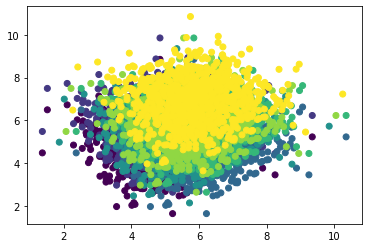

In [35]:
plt.scatter(XY[:,0], XY[:,1], c=annotations)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
import time
import seaborn as sns

In [37]:
data, labels = shuffle(XY, annotations)
test_size = int(len(data) * 0.5)
Xtrain = data[:test_size]
Ytrain = labels[:test_size]
Xtest = data[test_size:]
Ytest = labels[test_size:]

In [38]:
# Значение точности классификации R1=0.31 R2=0.33

In [39]:
class NaiveBayes(object):
    def __init__(self):
        self.meanX = []
        self.meanY = []
        self.stdX = []
        self.stdY = []
        self.pY = []
        
    def fit(self,Xtrain,Ytrain):
        for i in range(number_of_classes):
            classX = []
            classY = []
            for k in range(len(Xtrain)):
                if Ytrain[k]==i+1:
                    classX.append(Xtrain[k][0])
                    classY.append(Xtrain[k][1])
            self.meanX.append(np.mean(classX))
            self.meanY.append(np.mean(classY))
            self.stdX.append(np.std(classX))
            self.stdY.append(np.std(classY))
            self.pY.append(len(classX)/len(classY))

    def predict(self,Xtest):

        predictY = []
        def likelihood(mean,std,x):
            return (1/np.sqrt(2*np.pi*std**2))*np.exp(-((x - mean) ** 2) / (2 * std ** 2))

        def kernel(X,Y):
            p=0
            id = 0
            for i in range(number_of_classes):
                PP=self.pY[i]*likelihood(self.meanX[i],self.stdX[i],X)*likelihood(self.meanY[i],self.stdY[i],Y)
                if PP > p:
                    p = PP
                    id = i
            predictY.append(id+1)

        for i in range(len(Xtest)):
            kernel(Xtest[i][0], Xtest[i][1])

        return np.array(predictY)

In [40]:
def evaluate(P, T, name):
    # P - predictions
    # T - targets
    # accuracy = correct predictions / all predictions
    accuracy = np.mean(P == T)
    print(name,accuracy*100, '%')

In [41]:
classifiers = [NaiveBayes(), GaussianNB(),MultinomialNB(),ComplementNB(),BernoulliNB()]
names = ["MyNaiveBayes", "GaussianNB","MultinomialNB","ComplementNB","BernoulliNB"]

times = []
accuracy = []

In [42]:
for i in range(len(classifiers)):
    currentTime = time.time()
    classifiers[i].fit(Xtrain,Ytrain)
    accuracy.append(classifiers[i].predict(Xtest))
    times.append(time.time()-currentTime)
   

In [43]:
#Confusion matrix

MyNaiveBayes


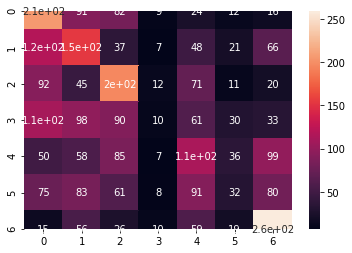

In [44]:
print(names[0])
conf_mat = confusion_matrix(Ytest, accuracy[0])
sns.heatmap(conf_mat, annot=True)

GaussianNB


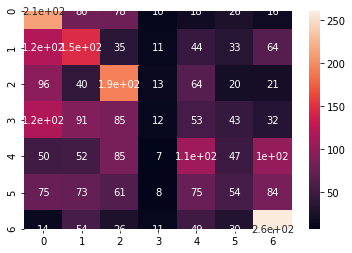

In [45]:
print(names[1])
conf_mat = confusion_matrix(Ytest, accuracy[1])
sns.heatmap(conf_mat, annot=True)

MultinomialNB


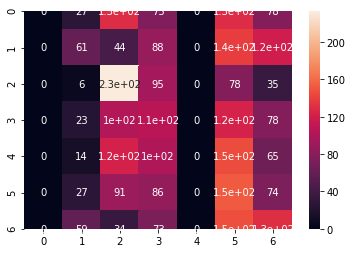

In [46]:
print(names[2])
conf_mat = confusion_matrix(Ytest, accuracy[2])
sns.heatmap(conf_mat, annot=True)

ComplementNB


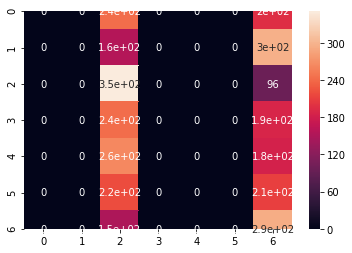

In [47]:
print(names[3])
conf_mat = confusion_matrix(Ytest, accuracy[3])
sns.heatmap(conf_mat, annot=True)

BernoulliNB


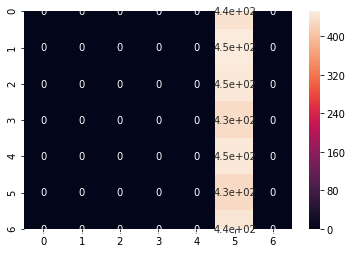

In [48]:
print(names[4])
conf_mat = confusion_matrix(Ytest, accuracy[4])
sns.heatmap(conf_mat, annot=True)

In [49]:
%timeit classifiers[0].fit(Xtrain,Ytrain)
%timeit classifiers[1].fit(Xtrain,Ytrain)
%timeit classifiers[2].fit(Xtrain,Ytrain)
%timeit classifiers[3].fit(Xtrain,Ytrain)
%timeit classifiers[4].fit(Xtrain,Ytrain)

6.81 ms ± 41.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.68 ms ± 1.48 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.67 ms ± 983 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.67 ms ± 3.77 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.72 ms ± 2.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


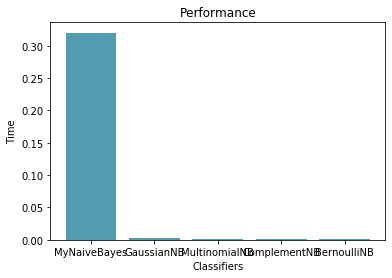

In [50]:
def barplot(x_data, y_data, x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points

    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    plt.show()
barplot(names,times, "Classifiers", "Time", "Performance")

In [51]:
for i in range (len(classifiers)):
    evaluate(accuracy[i],Ytest,names[i])

MyNaiveBayes 31.351001939237232 %
GaussianNB 31.803490627020036 %
MultinomialNB 22.107304460245636 %
ComplementNB 20.846800258564965 %
BernoulliNB 13.89786683904331 %


In [52]:
## The Best Performance: MultinomialNB
## The Best Accuracy: GaussianNB
